# Machine Learning: CNN Architectures

## MNIST Dataset

In [1]:
import tensorflow as tf

C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [3]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [4]:
# image preprocessing
NB_IMAGES_TO_USE = 1000

train_images = train_images[:NB_IMAGES_TO_USE] / 255.0
test_images = test_images[:NB_IMAGES_TO_USE]  / 255.0

In [5]:
print(train_images.shape, test_images.shape)

(1000, 28, 28) (1000, 28, 28)


### Plot images with random noise

In [6]:
import pylab as plt
import numpy as np

Text(0.5, 1.0, 'Noised')

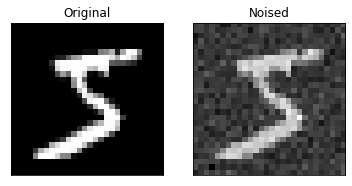

In [7]:
plt.subplot(121)
plt.imshow(train_images[0], cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())
plt.title("Original")
plt.subplot(122)
plt.imshow(train_images[0] + np.random.normal(0., 0.1, (28, 28)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.title("Noised")
#plt.show()

## UNet Architecture for MNIST Denoising 

### The architecture 

<img src="images/a_simple_unet.png" width="70%" height="30%"> 

As a reminder 
<img src="images/cnn_conv_design.png" width="70%" height="30%"> 

### Coding the model

In [8]:
# Encoder part

inputs = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(inputs)
l1 = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(x)


x = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same", strides=2)(l1) 
l2 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)


x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", strides=2)(l2) 
x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)

# Decoder part
x = tf.keras.layers.Conv2DTranspose(16, (3,3), activation="relu", padding="same", strides=2)(x)
x = tf.keras.layers.Concatenate()([x, l2])
x = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)


x = tf.keras.layers.Conv2DTranspose(8, (3,3), activation="relu", padding="same", strides=2)(x)
x = tf.keras.layers.Concatenate()([x, l1])
x = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(x)

# Output Layer
x = tf.keras.layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model = tf.keras.Model(inputs, x) 
model.compile(loss="binary_crossentropy", optimizer="adam")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 16)   1168        conv2d_1[0][0]                   
______________________________________________________________________________________________

In [11]:
cbk = tf.keras.callbacks.TensorBoard('mnist_cnn')

In [12]:
train_images[:,:,:,np.newaxis].shape

(1000, 28, 28, 1)

## Image Generators

In [13]:
def generator(images):
    while True:
        for im in images:
            noised = im + np.random.normal(0., 0.1, im.shape)
            noised = noised[np.newaxis]
            yield noised, im[np.newaxis]

In [14]:
train_gen = generator(train_images)

In [15]:
a, b = next(train_gen)

In [16]:
a.shape

(1, 28, 28)

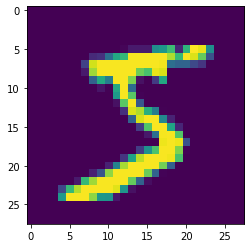

In [17]:
plt.imshow(np.squeeze(b))

### Training

In [18]:
cbk = tf.keras.callbacks.TensorBoard('mnist_unet_2')

In [19]:
train_gen = generator(train_images[:,:,:,np.newaxis])
model.fit(train_gen, epochs=10, steps_per_epoch=20, callbacks=[cbk])

Epoch 1/10
20/20 [==============================] - 2s 114ms/step - loss: 0.6753
Epoch 2/10
20/20 [==============================] - 0s 18ms/step - loss: 0.5055
Epoch 3/10
20/20 [==============================] - 0s 18ms/step - loss: 0.1684
Epoch 4/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0937
Epoch 5/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0859
Epoch 6/10
20/20 [==============================] - 0s 16ms/step - loss: 0.0735
Epoch 7/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0709
Epoch 8/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0743
Epoch 9/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0696
Epoch 10/10
20/20 [==============================] - 0s 16ms/step - loss: 0.0713


### Testing

In [20]:
test_im = test_images[5][np.newaxis, :,:, np.newaxis] + np.random.normal(0., 0.1, (1, 28, 28, 1))

In [21]:
outputs = model.predict(test_im)

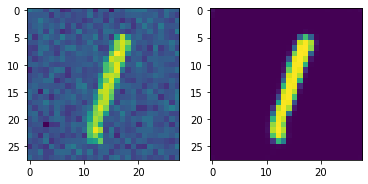

In [22]:
plt.subplot(121)
plt.imshow(np.squeeze(test_im))
plt.subplot(122)
plt.imshow(np.squeeze(outputs))

## Residual Networks

### The Residual Unit and Example

<img src="images/residulal_unit_and_exple.png" width="70%" height="30%"> 

### Our Previous UNet with Residual Skip Connections

<img src="images/unet_residual_skips.png" width="70%" height="30%"> 

### Coding: UNet with Residual Skip Connections

In [23]:
# Encoder part

inputs = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(inputs)
l1 = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same", strides=2)(l1) 
l2 = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", strides=2)(l2) 
x = tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)

# Decoder part
x = tf.keras.layers.Conv2DTranspose(16, (3,3), activation="relu", padding="same", strides=2)(x)

x = tf.keras.layers.Add()([x, l2])

x = tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)
x = tf.keras.layers.Conv2DTranspose(8, (3,3), activation="relu", padding="same", strides=2)(x)

x = tf.keras.layers.Add()([x, l1])

x = tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same")(x)

# Output Layer
x = tf.keras.layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)